# Visualizing Forex Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

FOLDER_PATH = "/Users/ytpatel3/Downloads/forex_pairs_data"
CURRENCY_PAIRS = ["EURUSD", "GBPUSD", "AUDUSD", "USDJPY", "USDCHF", "USDCAD"]

In [5]:
data_dct = {}

for i in CURRENCY_PAIRS:
    file_path = FOLDER_PATH + "/" + i[:3] + "_" + i[3:] + "_forex_data.csv"
    df = pd.read_csv(file_path)

    # rename column 1
    df = df.rename(columns={"Unnamed: 0": "Date"})
    
    symbol = i[:3] + "/" + i[3:]
    data_dct[symbol] = df
    
print(data_dct["EUR/USD"])

          Date     open     high      low    close  SMA_200      RSI   SLOW_K  \
0   2024-05-30  1.08354  1.08826  1.08116  1.08354   1.0789  54.2938  53.4004   
1   2024-06-02  1.08530  1.08909  1.08280  1.08530   1.0790  56.6113  53.1580   
2   2024-06-03  1.09074  1.09182  1.08607  1.09074   1.0790  62.8586  55.4196   
3   2024-06-04  1.08819  1.08899  1.08610  1.08819   1.0790  58.5917  53.7812   
4   2024-06-05  1.08745  1.08987  1.08637  1.08745   1.0790  57.3857  52.4433   
..         ...      ...      ...      ...      ...      ...      ...      ...   
95  2024-10-13  1.09254  1.09397  1.09057  1.09254   1.0875  34.1647  35.9672   
96  2024-10-14  1.09092  1.09182  1.08858  1.09092   1.0875  32.7776  35.0822   
97  2024-10-15  1.08841  1.09016  1.08682  1.08841   1.0875  30.7029  30.3285   
98  2024-10-17  1.08295  1.08637  1.08282  1.08295   1.0874  26.7333  27.8168   
99  2024-10-18  1.08342  1.08731  1.08284  1.08696   1.0874  33.5214  25.2939   

     SLOW_D  
0   55.6166  

In [8]:
def plot_data(pair, df):
    fig, axs = plt.subplots(3, 1, figsize=(14, 12))
    fig.suptitle(f"{pair} Data Visualizations", fontname="Helvetica", fontsize=30)
    
    # OHLC + 200-day SMA
    axs[0].plot(df.index, df['open'], label='Open Price', color='blue', linewidth=1)
    axs[0].plot(df.index, df['high'], label='High Price', color='purple', linewidth=1)
    axs[0].plot(df.index, df['low'], label='Low Price', color='turquoise', linewidth=1)
    axs[0].plot(df.index, df['close'], label='Close Price', color='green', linewidth=1)
    axs[0].plot(df.index, df['SMA_200'], label='200-day SMA', color='orange', linestyle='--', linewidth=3)

    axs[0].set_ylabel("Price")
    axs[0].legend()
    axs[0].set_title(f"{pair} OHLC + 200-day Simple Moving Average (SMA)")

    # 200-day RSI
    axs[1].plot(df.index, df['RSI'], label='RSI', color="gray", linewidth=2)
    axs[1].axhline(70, label='Overbought (70)', color = 'red', linestyle='--', linewidth=2)
    axs[1].axhline(30, label='Oversold (30)', color = 'green', linestyle='--', linewidth=2)

    axs[0].set_ylabel("RSI")
    axs[1].legend()
    axs[1].set_title(f"{pair} 200-day Relative Strength Index (RSI)")

    # Slow Stochastic Oscillator; slowk_period=14, slowd_period=3
    axs[2].plot(df.index, df['SLOW_K'], label='%K Line', color='maroon')
    axs[2].plot(df.index, df['SLOW_D'], label='%D Line', color='darkorange')
    axs[2].axhline(80, color='gray', linestyle='--', label='Overbought (80)')
    axs[2].axhline(20, color='gray', linestyle='--', label='Oversold (20)')
    
    axs[2].set_ylabel('Stochastic Oscillator')
    axs[2].legend()
    axs[2].set_title(f'{symbol} Stochastic Oscillator')

## Visualize OHLC data with 200-day SMA (simple moving average), visualize RSI (relative strength index), and visualize Stochastic Oscillator for every pair

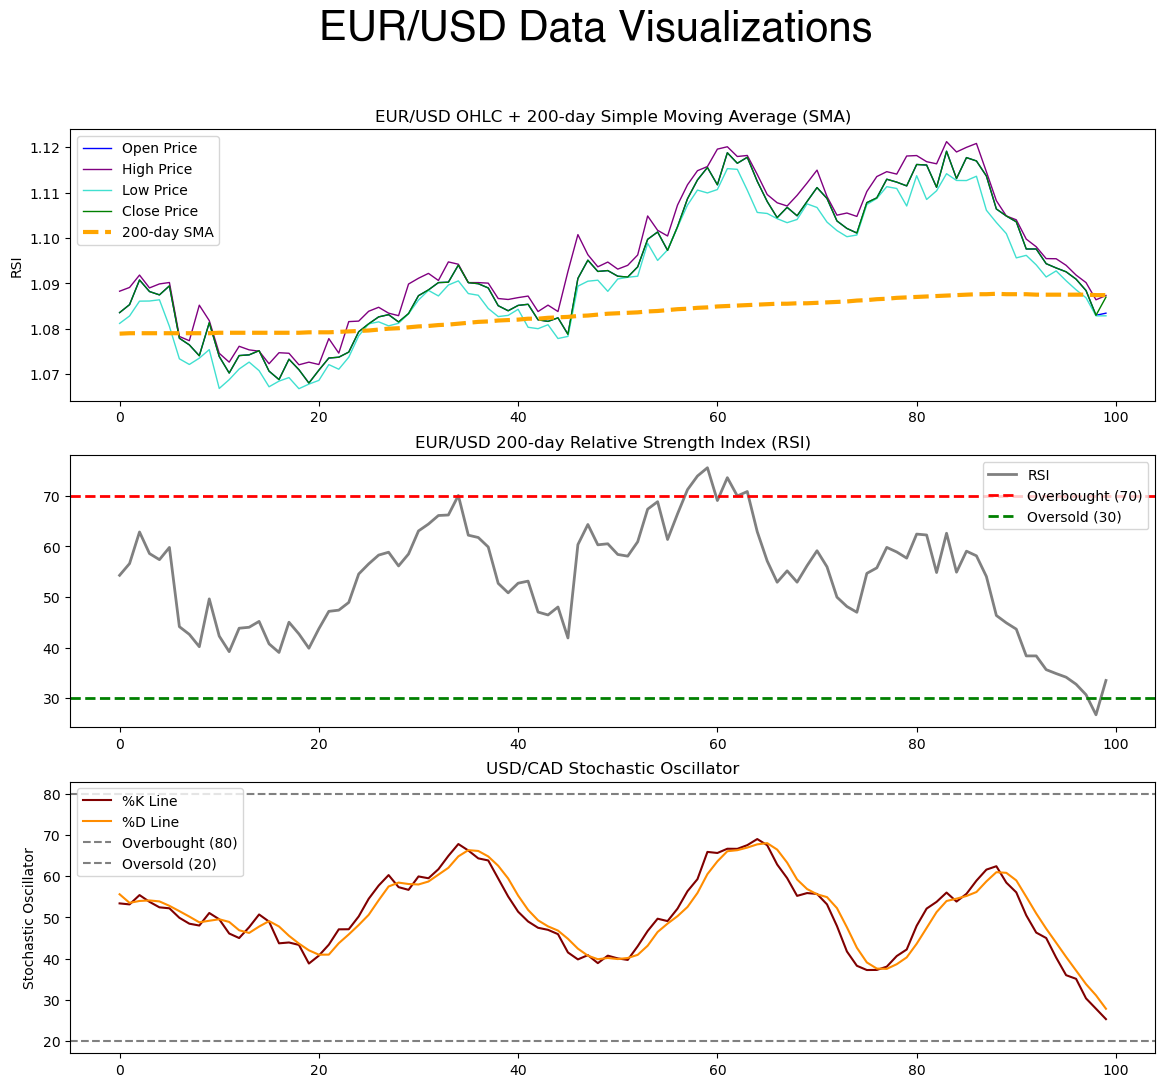

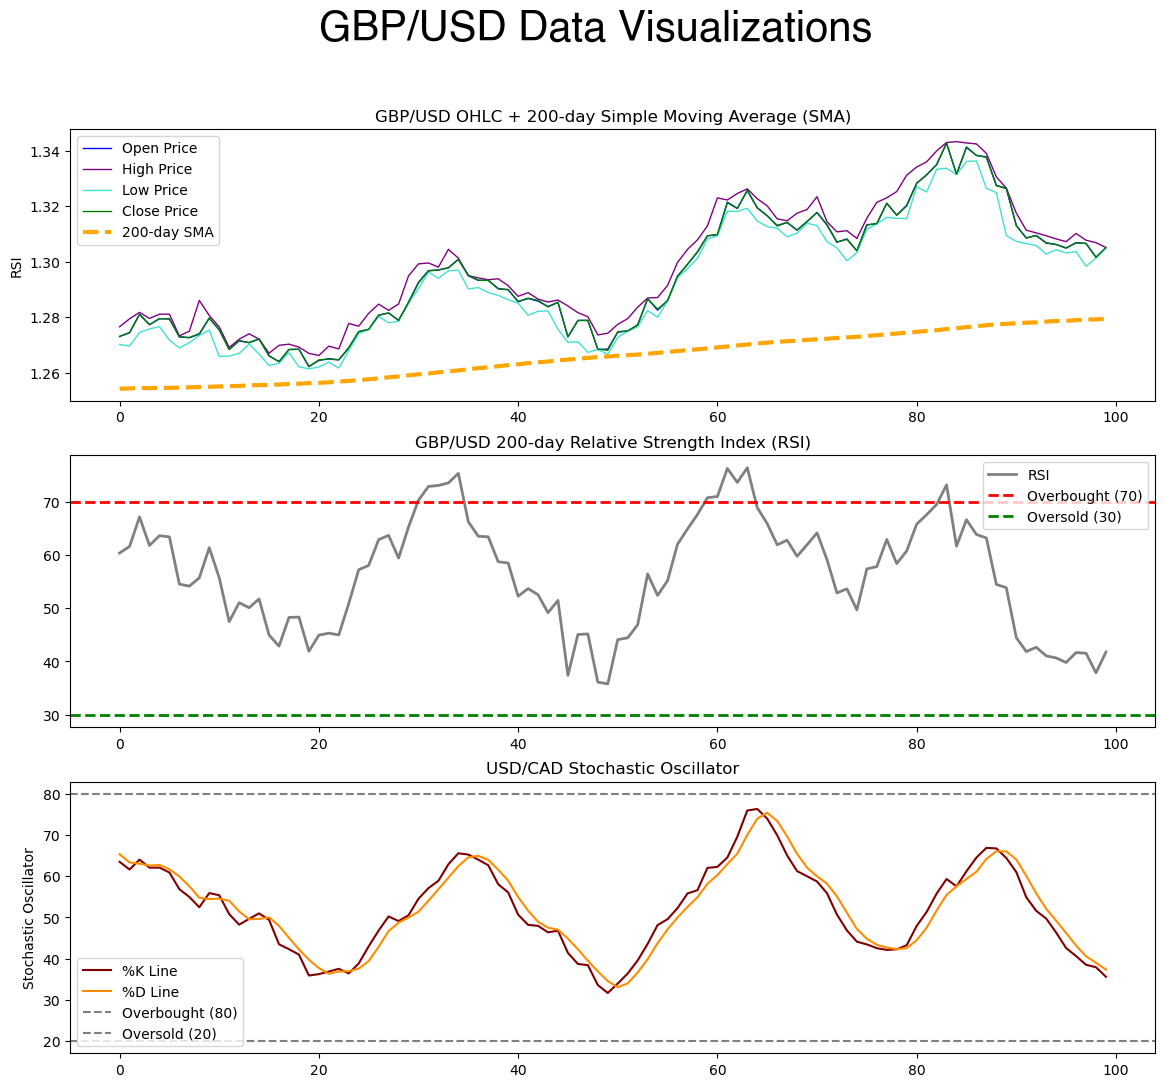

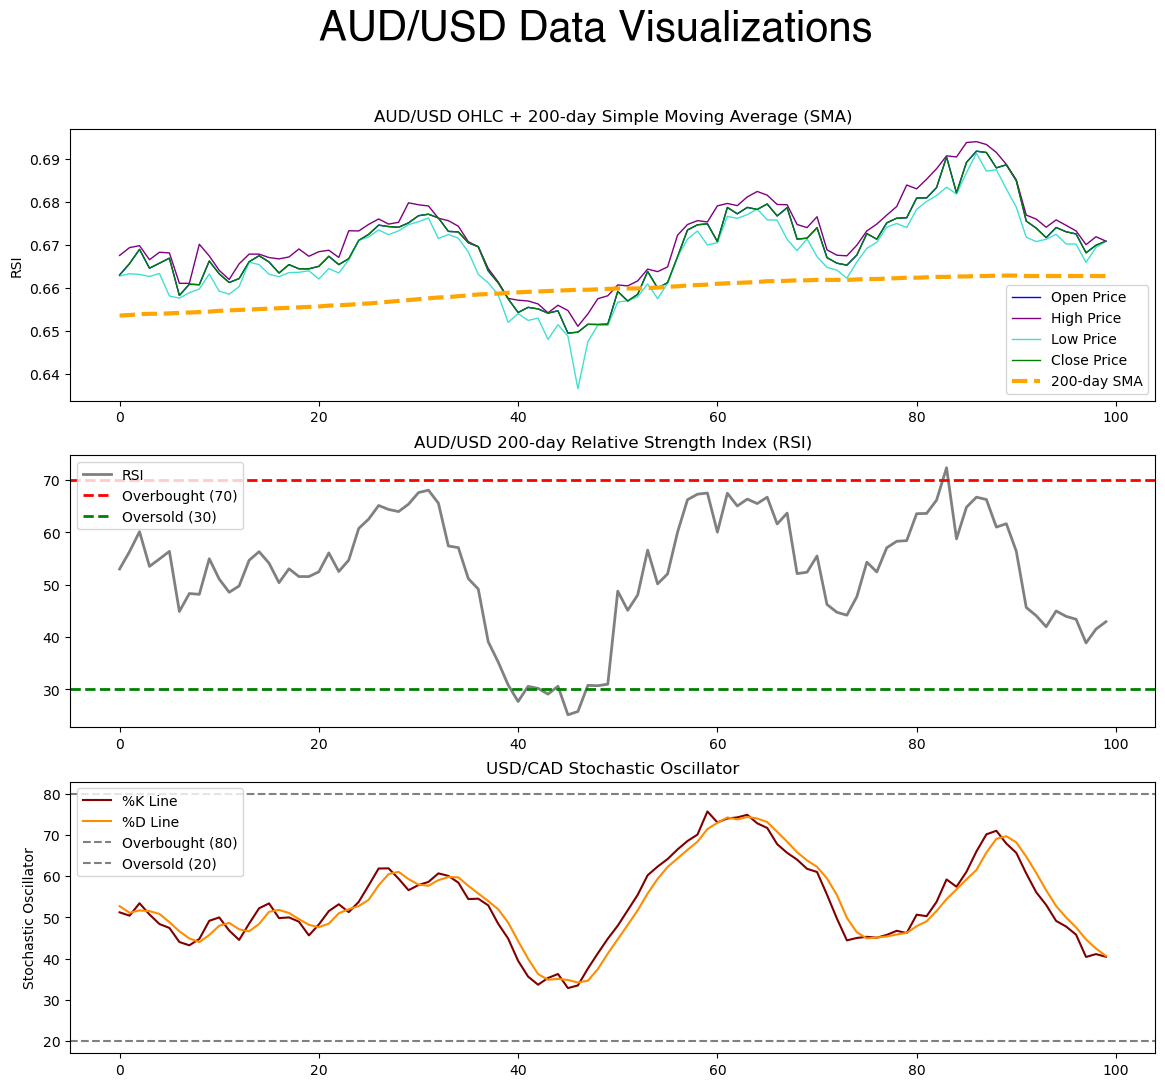

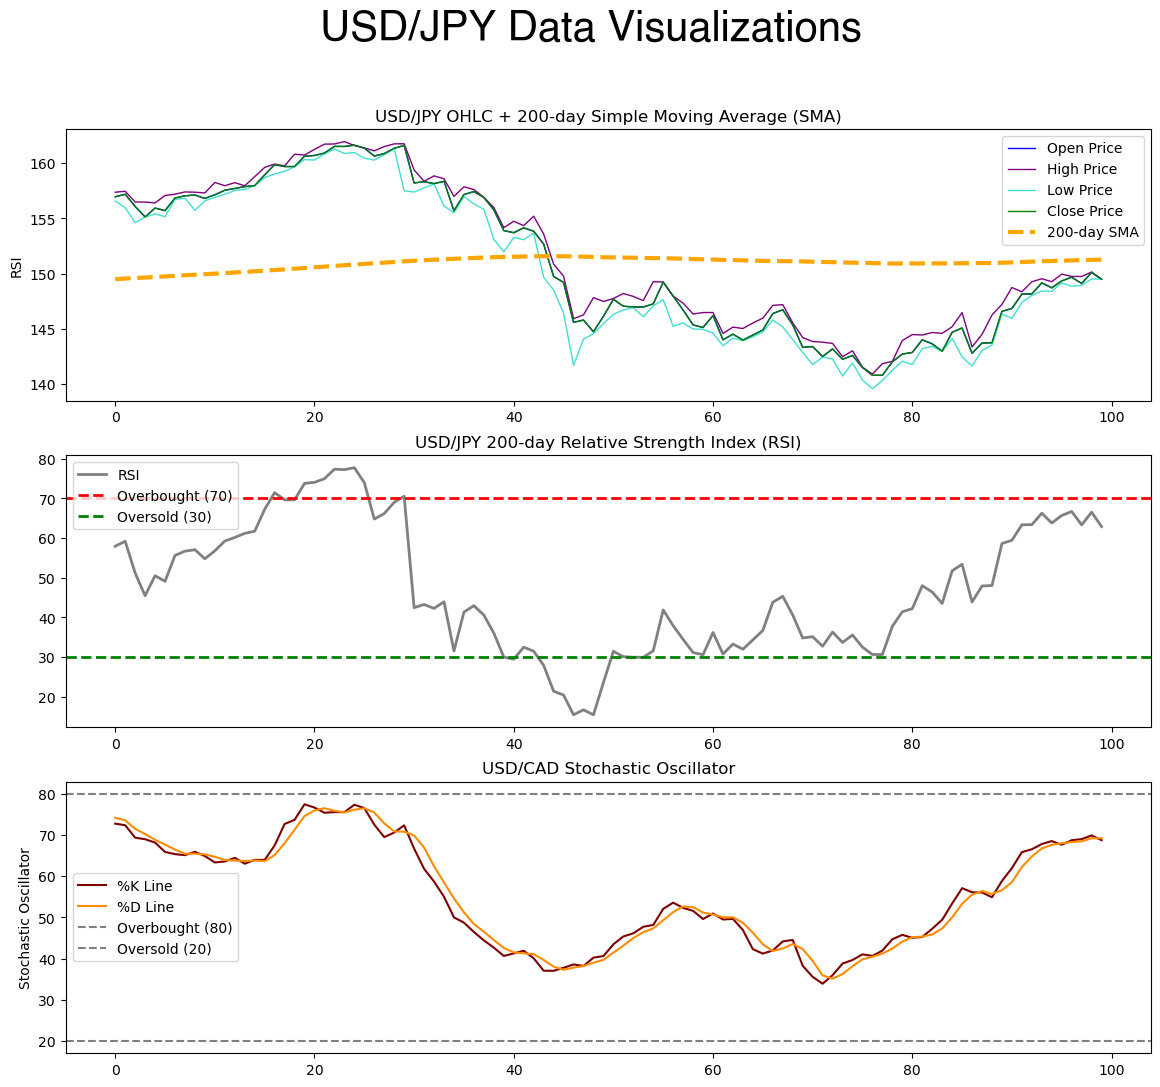

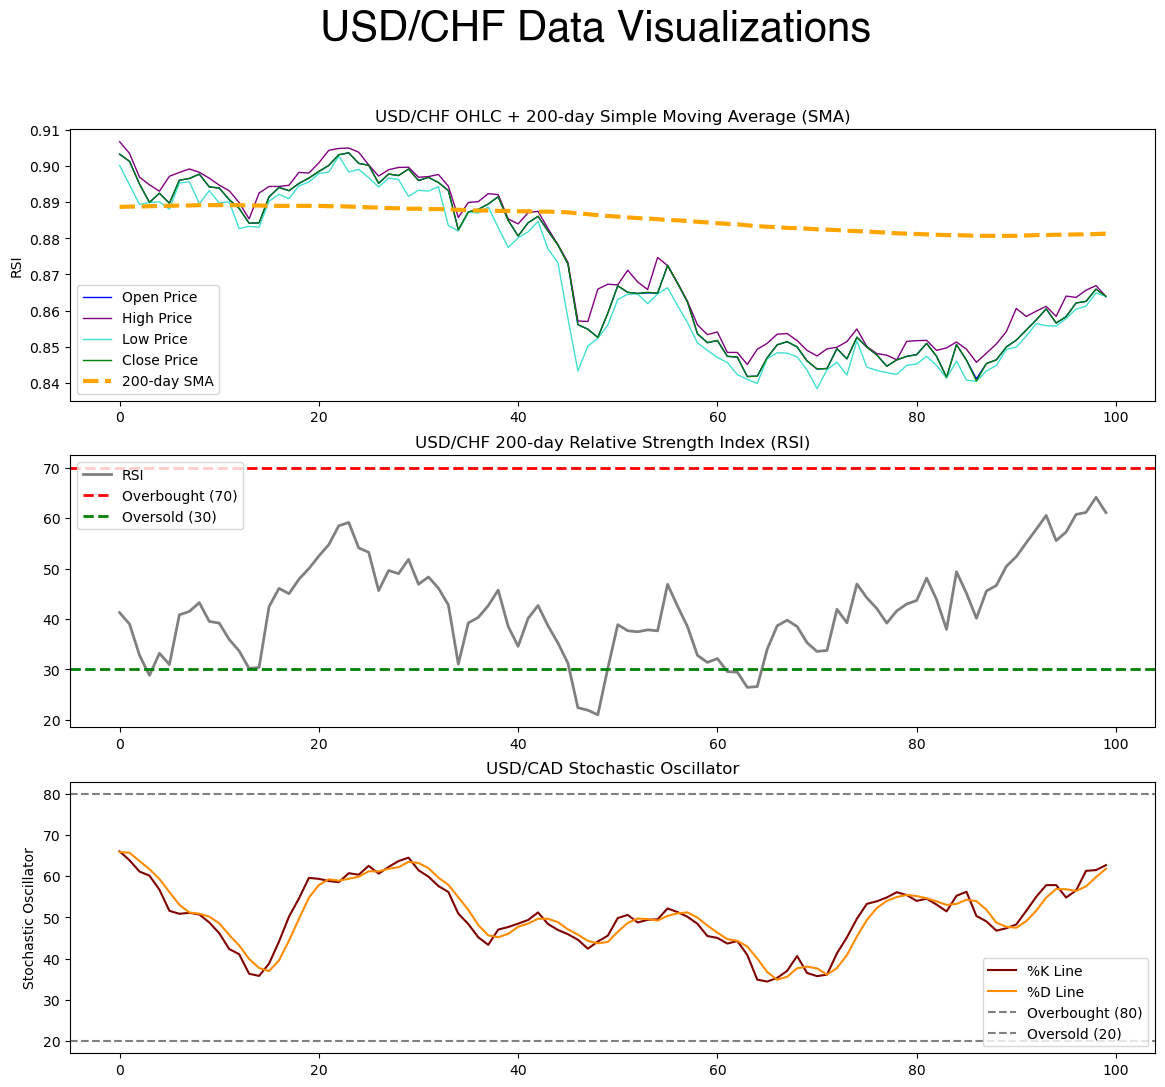

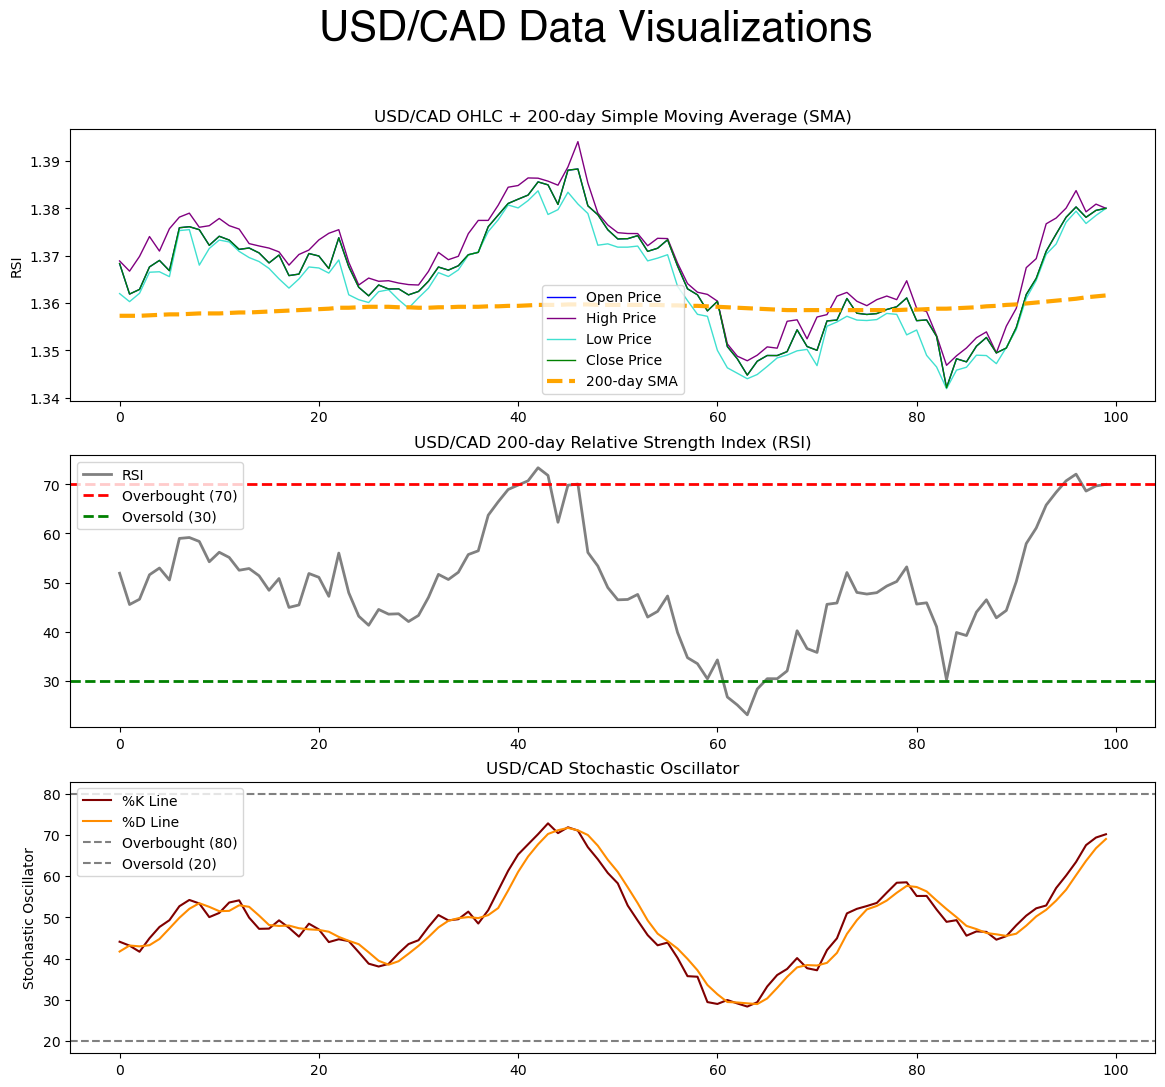

In [10]:
for pair, df in data_dct.items():
    plot_data(pair, df)

## Plot possible correlation between feature

In [11]:
def plot_corr(pair, df):

    corr_df = df[['close', 'SMA_200', 'RSI', 'SLOW_K', 'SLOW_D']]
    corr = corr_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {symbol} Indicators')
    plt.show()

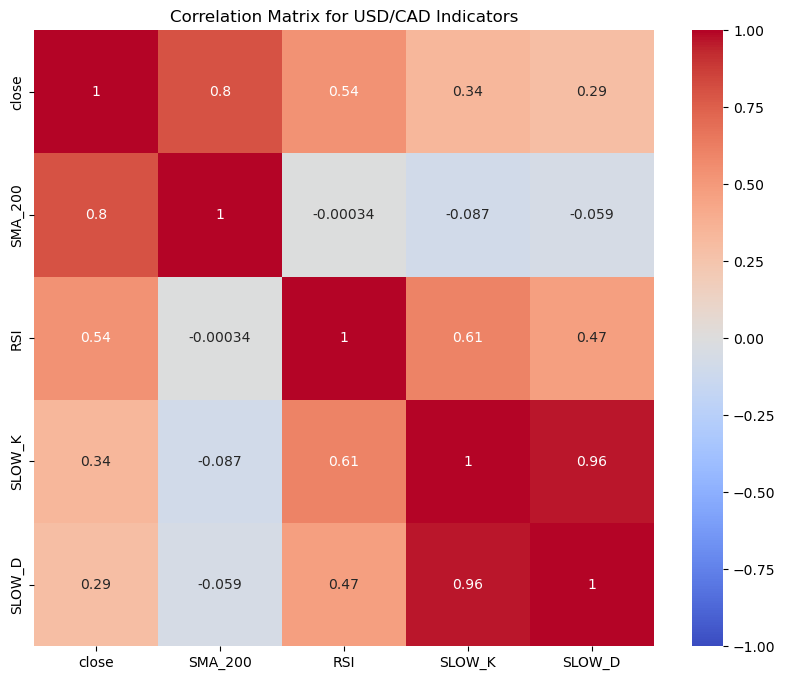

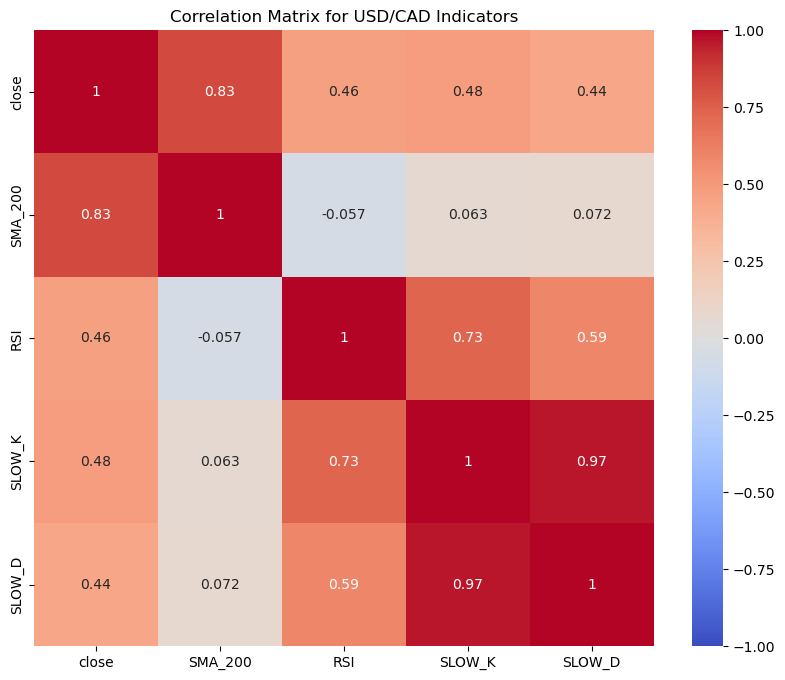

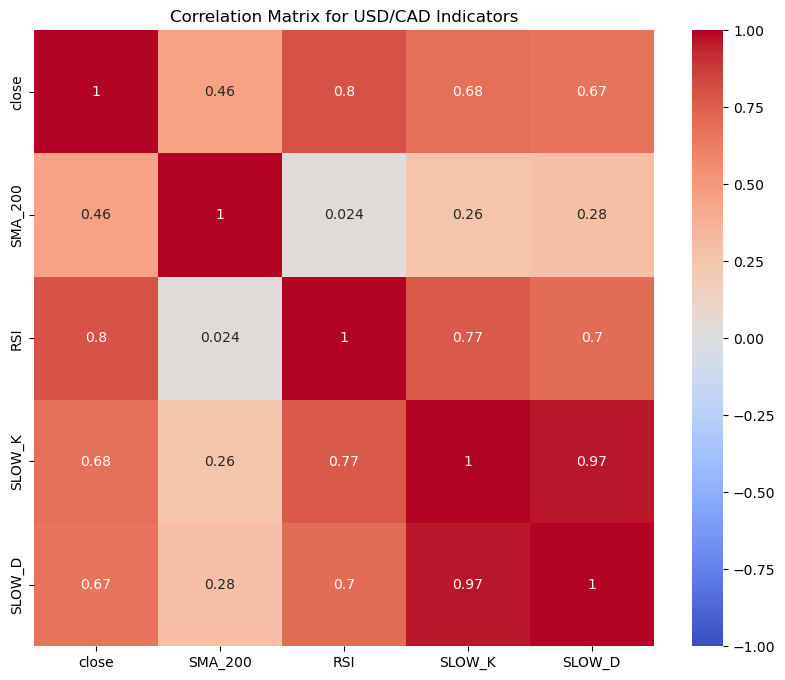

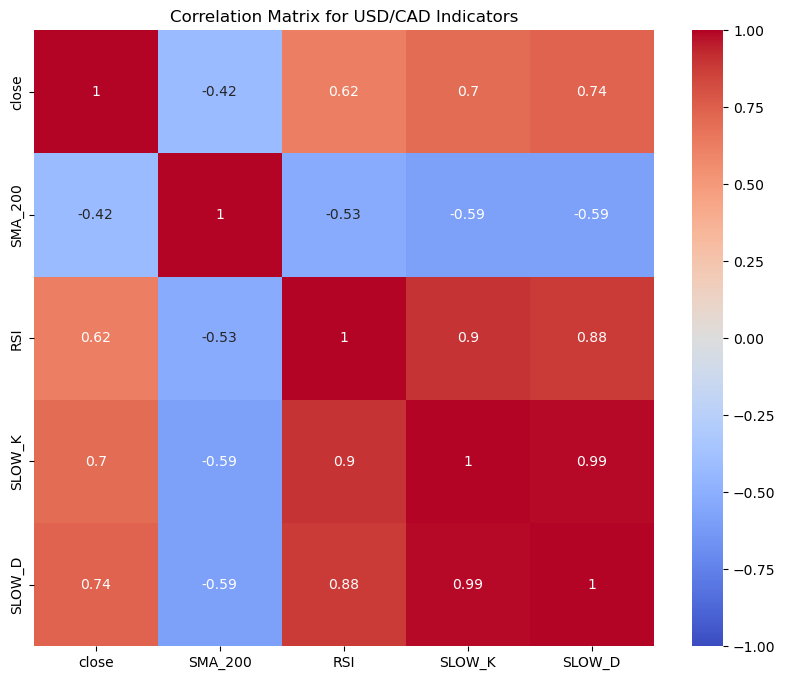

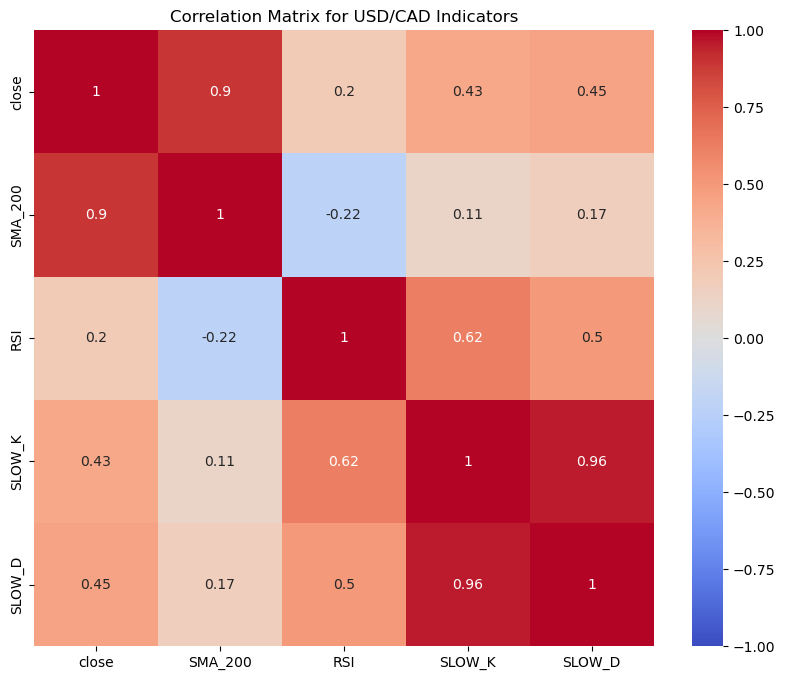

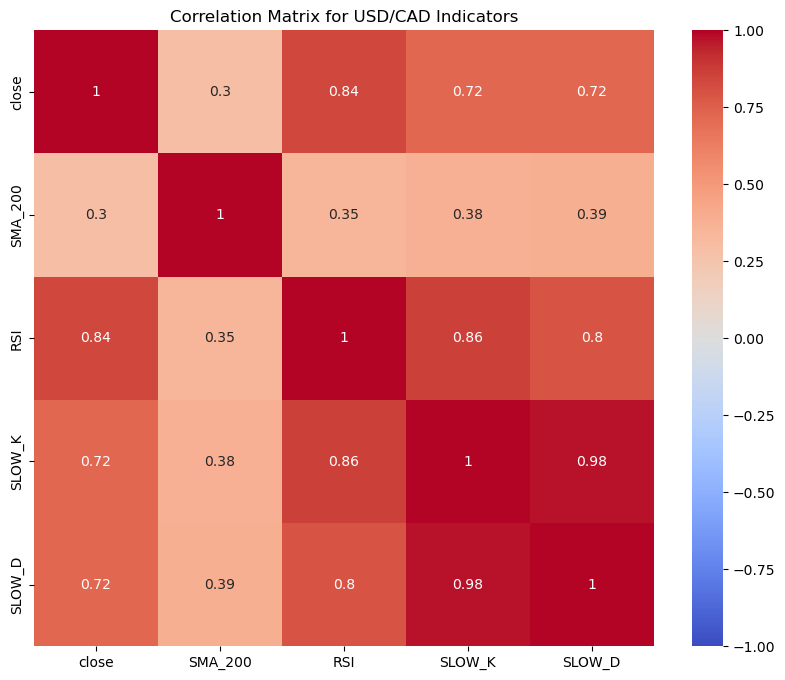

In [6]:
for pair, df in data_dct.items():
    plot_corr(pair, df)